In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
athletes = pd.read_excel('./data/olympics-data.xlsx')
athletes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [15]:
noc = pd.read_csv('./data/noc_regions.csv')
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
athletes.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


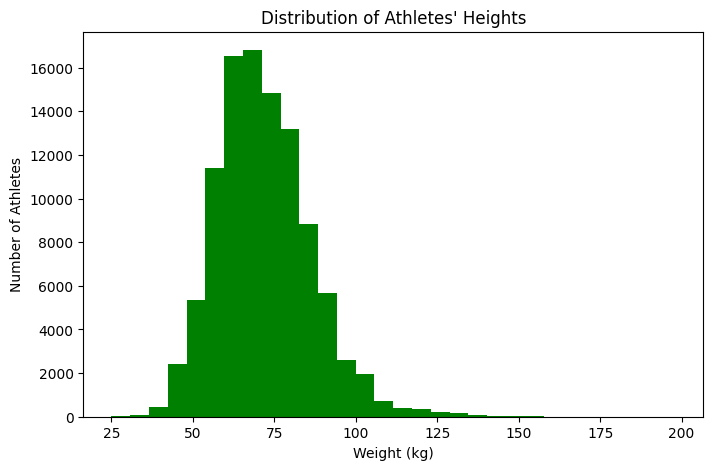

In [ ]:
#Athletes' weights distribution
athletes['weight_kg'].plot(kind='hist', bins=30, color='green', figsize=(8,5), title="Distribution of Athletes' Weights")

plt.xlabel("Weight (kg)")
plt.ylabel("Number of Athletes")
plt.show()


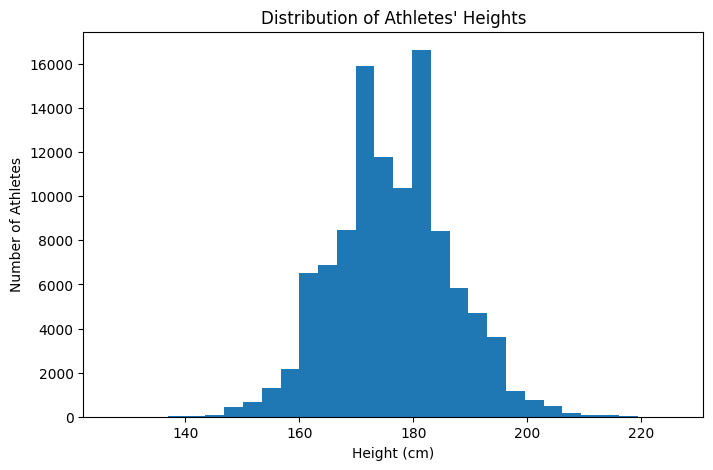

In [ ]:
#Athletes' heights distribution
athletes['height_cm'].plot(kind='hist', bins=30, figsize=(8,5), title="Distribution of Athletes' Heights")

plt.xlabel("Height (cm)")
plt.ylabel("Number of Athletes")
plt.show()


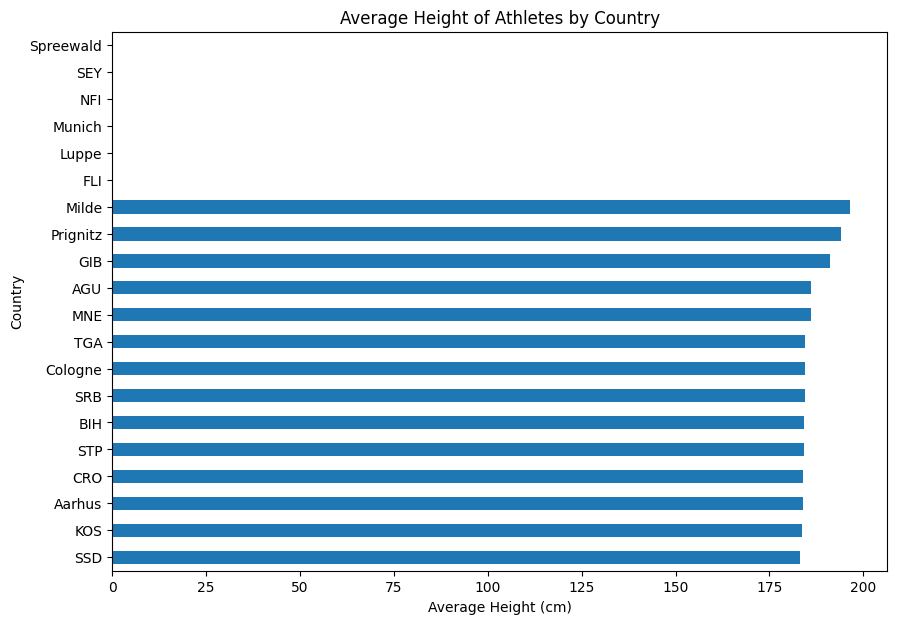

In [ ]:
#Average height of athletes by country
athletes.groupby('born_country')['height_cm'].mean().sort_values().tail(20).plot(kind='barh', figsize=(10,7), title="Average Height of Athletes by Country")

plt.xlabel("Average Height (cm)")
plt.ylabel("Country")
plt.show()


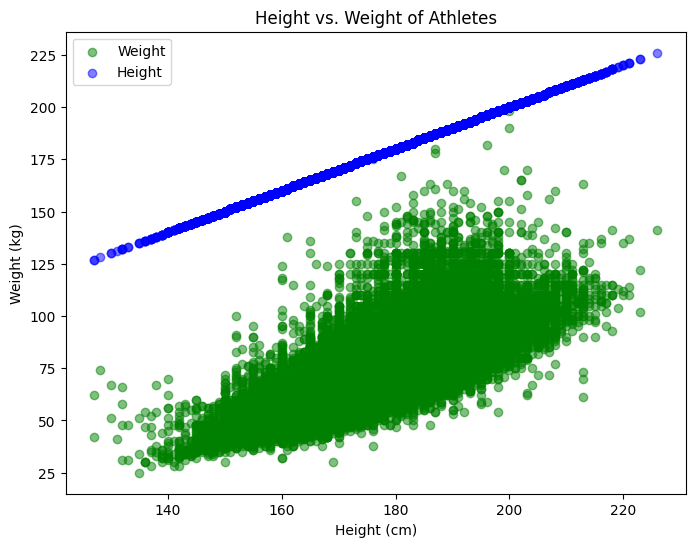

In [ ]:
#Heigh and weight of athletes

plt.figure(figsize=(8,6))

plt.scatter(athletes['height_cm'], athletes['weight_kg'], color='green', alpha=0.5, label="Weight")

plt.scatter(athletes['height_cm'], athletes['height_cm'], color='blue', alpha=0.5, label="Height")

plt.title("Height vs. Weight of Athletes")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")

plt.legend()
plt.show()

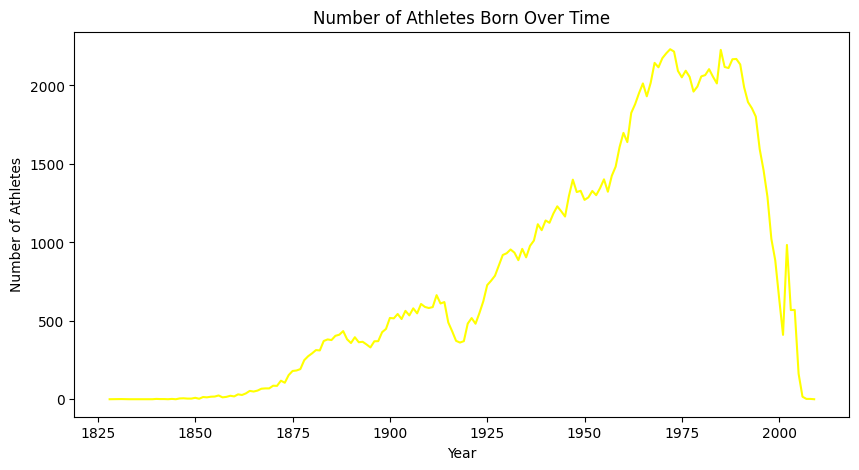

In [ ]:
#No. of athletes born over time

athletes['born_date'] = pd.to_datetime(athletes['born_date'])  

athletes['born_date'].dt.year.value_counts().sort_index().plot(kind='line', color='yellow', figsize=(10,5), title="Number of Athletes Born Over Time")

plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.show()


C:\Users\Mardyson Justin\AppData\Local\Temp\ipykernel_6372\3484732003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


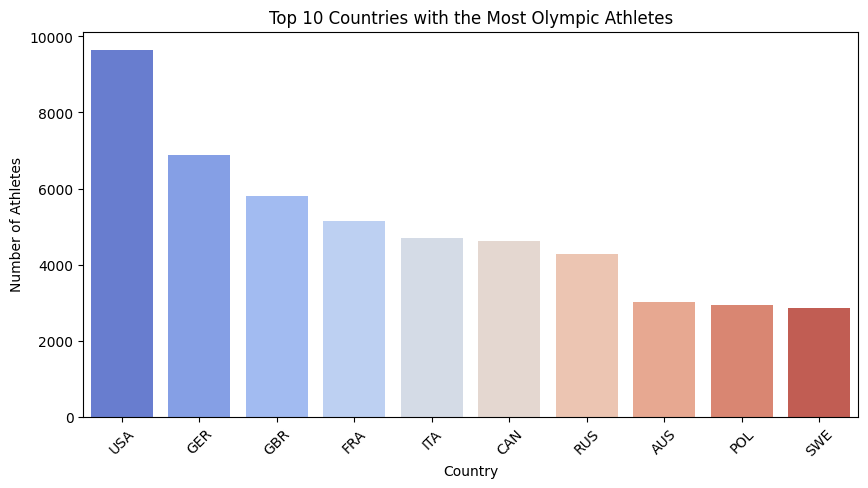

In [ ]:
#Top 10 countries with the most Olympians
top_countries = athletes['born_country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Athletes")
plt.title("Top 10 Countries with the Most Olympic Athletes")
plt.show()


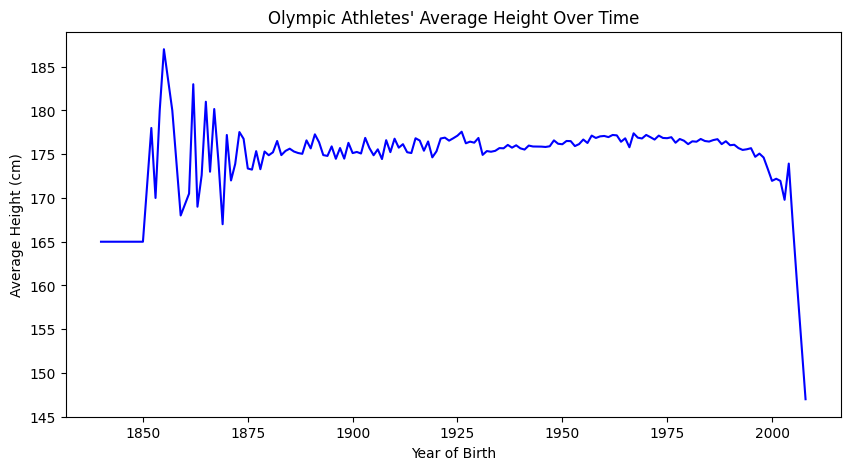

In [ ]:
#Are athletes getting taller over time? (dropped na values)

athletes['born_date'] = pd.to_datetime(athletes['born_date'])

height_over_time = athletes.dropna(subset=['height_cm']).groupby(athletes['born_date'].dt.year)['height_cm'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=height_over_time.index, y=height_over_time.values, color='blue')

plt.xlabel("Year of Birth")
plt.ylabel("Average Height (cm)")
plt.title("Olympic Athletes' Average Height Over Time")
plt.show()



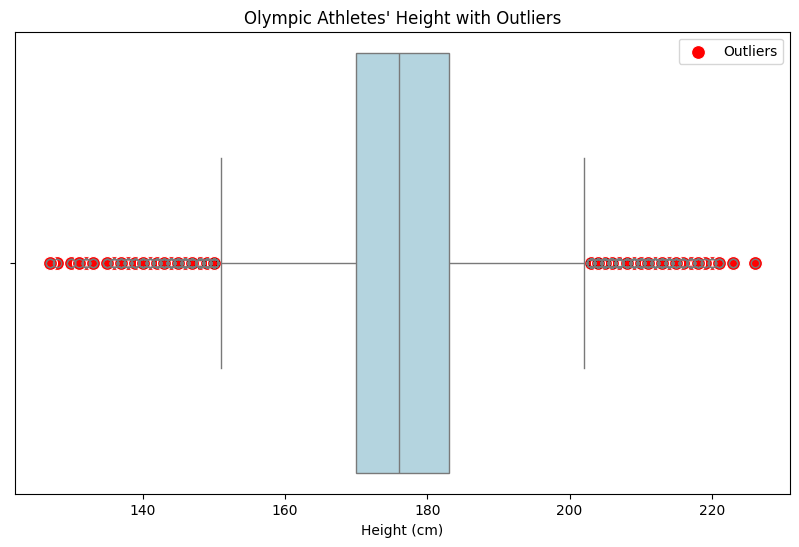

        athlete_id                name  height_cm
763            767     Jacqueline Díaz      146.0
769            773        Marcos Núñez      150.0
777            781         Deng Yaping      150.0
1080          1087      Bozhil Lozanov      208.0
1657          1664     Rogelio Marcelo      150.0
...            ...                 ...        ...
143957      147615     Esther Siamfuko      150.0
143966      147624     Margaret Belemu      145.0
143972      147630          Vast Phiri      150.0
144061      147727  Francisca Mardones      150.0
144271      147957    Madeline Schizas      150.0

[1490 rows x 3 columns]


In [ ]:
#Outliers in height

Q1 = athletes['height_cm'].quantile(0.25)
Q3 = athletes['height_cm'].quantile(0.75)
IQR = Q3 - Q1

outliers = athletes[(athletes['height_cm'] < (Q1 - 1.5 * IQR)) | (athletes['height_cm'] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(10, 6))

sns.boxplot(x=athletes['height_cm'], color='lightblue')

sns.scatterplot(x=outliers['height_cm'], y=[0] * len(outliers), color='red', s=100, label='Outliers')

plt.title("Olympic Athletes' Height with Outliers")
plt.xlabel("Height (cm)")
plt.legend()

plt.show()

print(outliers[['athlete_id', 'name', 'height_cm']])
